In [60]:
%load_ext autoreload
%autoreload 2

from tweedejaars_project import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import *
from sklearn.ensemble import *
import xgboost as xgb

df = load_df()

version = "target"
target = "fix_two_sided_ptu"
train_set = "train"
test_set = "valid"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


count    16.000000
mean     -0.006197
std       0.007732
min      -0.020250
25%      -0.009999
50%      -0.005017
75%      -0.000868
max       0.007543
Name: 0, dtype: float64
count    16.000000
mean     -0.019472
std       0.008934
min      -0.038252
25%      -0.023414
50%      -0.018582
75%      -0.014123
max      -0.003317
Name: 1, dtype: float64
count    16.000000
mean     -0.019472
std       0.008934
min      -0.038252
25%      -0.023414
50%      -0.018582
75%      -0.014123
max      -0.003317
Name: 2, dtype: float64
0.007543116573968399


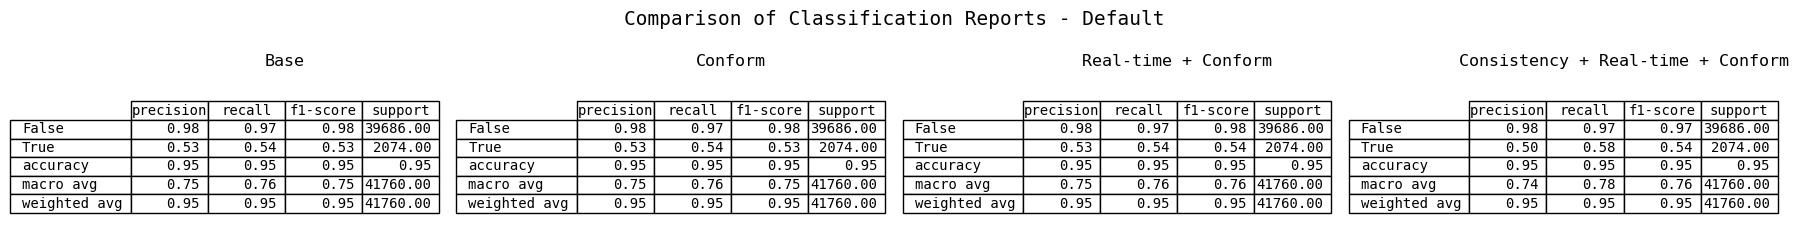

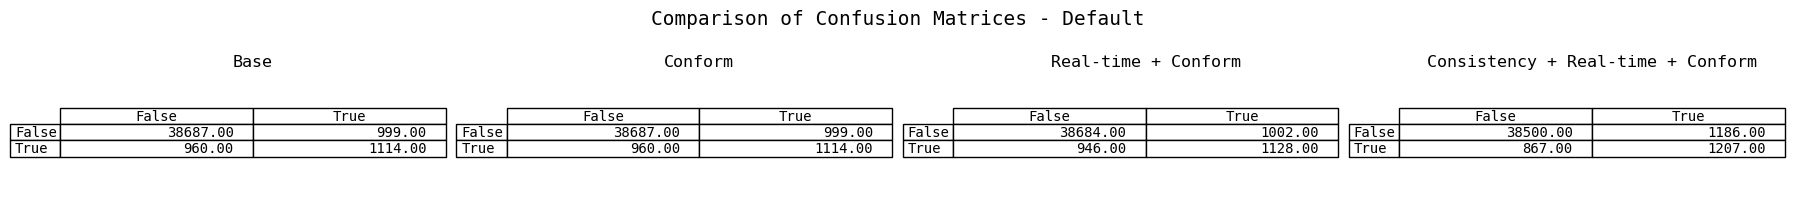

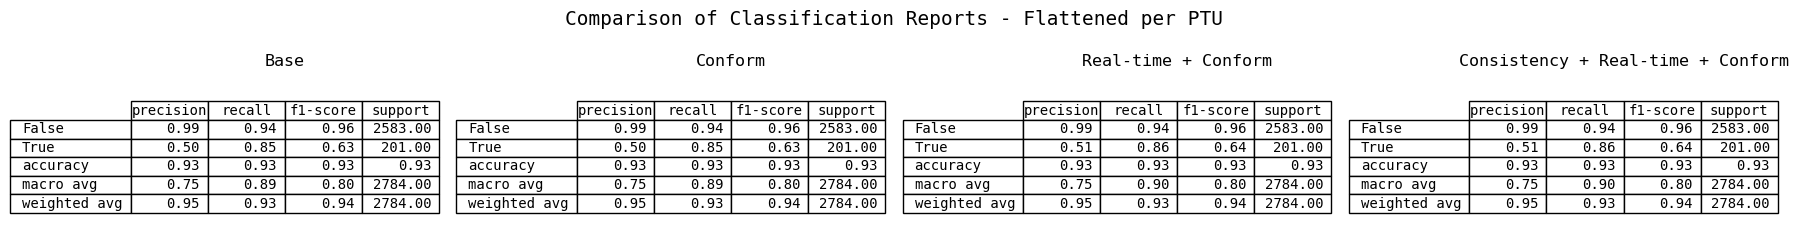

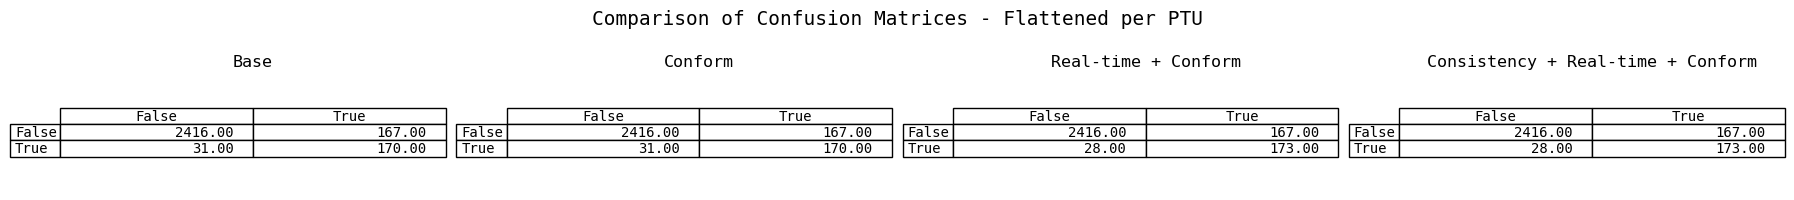

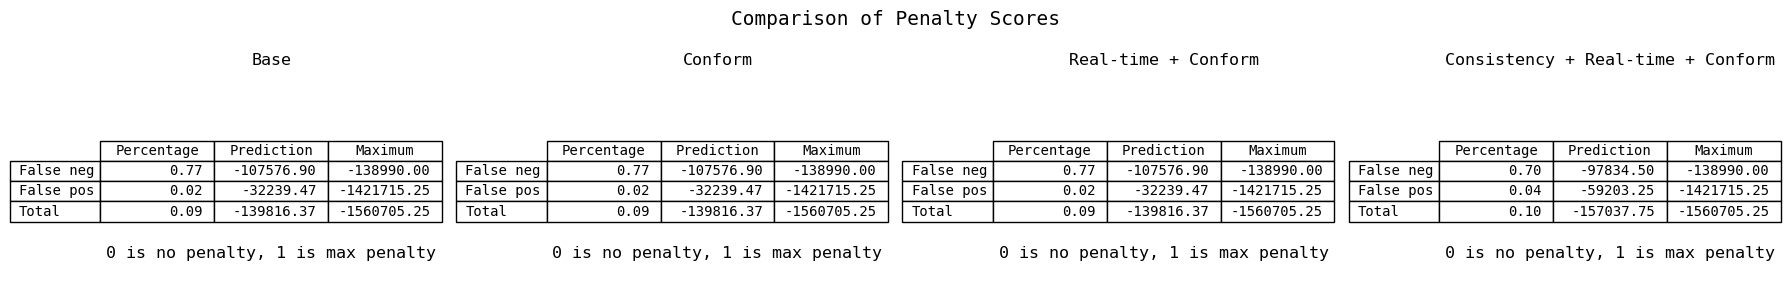

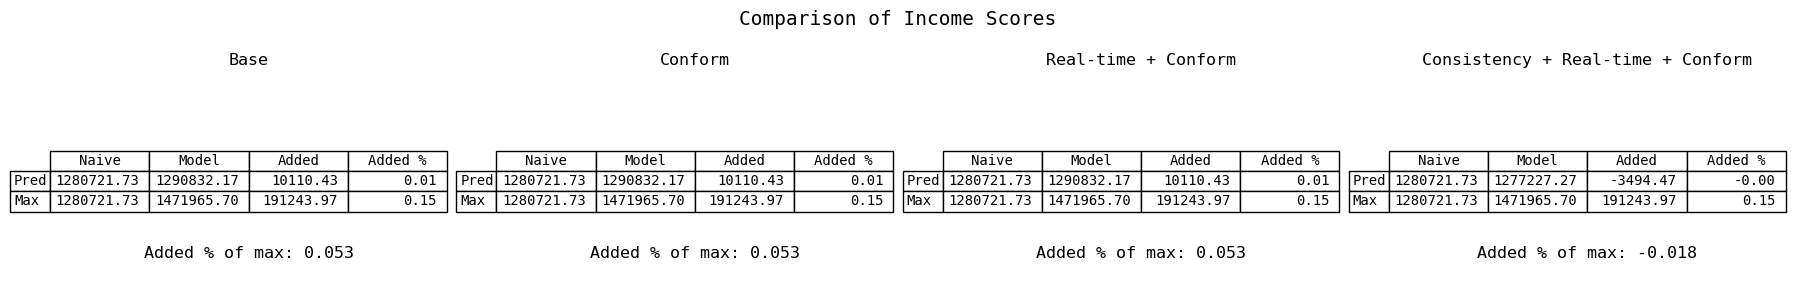

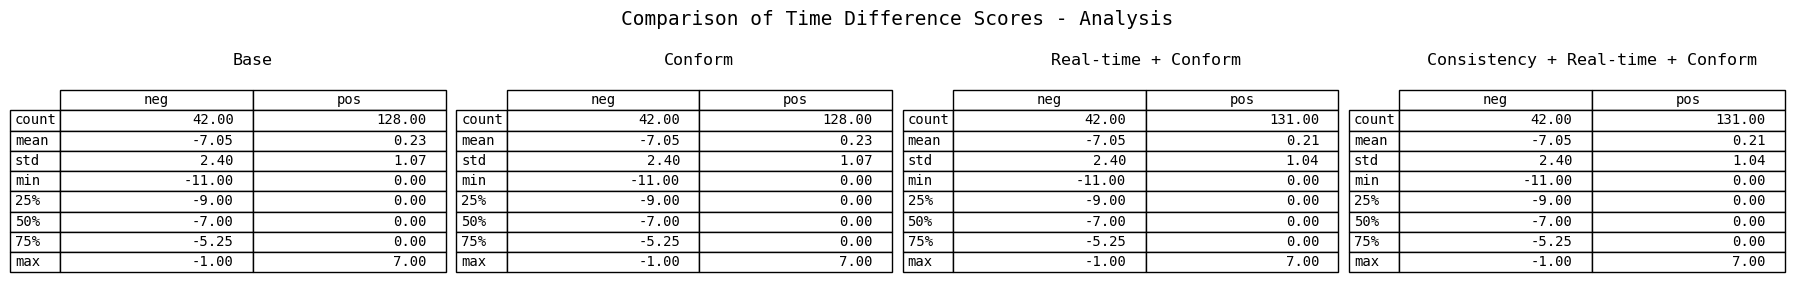

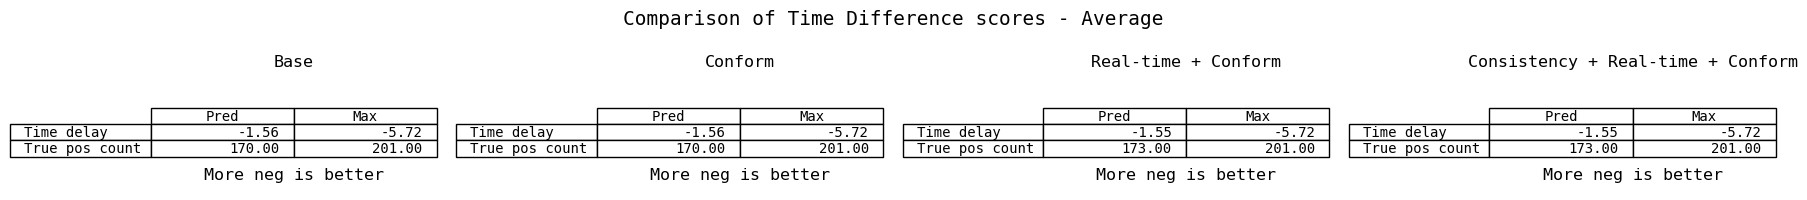

In [79]:
features = [
    "import_capacity",
    "min_price_published",
    "mid_price_published",
    "max_price_published",
    "min_ptu_price_known",
    "max_ptu_price_known",
    "time_since_last_two_sided",
    "two_sided_daily_count",
    "PTU",
    "naive_strategy_action",
    "vwap_avg",
    "vwap_std",
    "vwap_median",
    "vwap_qty_sum",
    "hvq_delta",
    "forecast_wind",
    "forecast_solar",
    "forecast_demand"
]
splits = get_splits(df, features, target, return_dict_pair=False)
# m = RandomForestClassifier(n_estimators=50)
# model = HistGradientBoostingRegressor(loss="poisson", l2_regularization=8, learning_rate=0.2, validation_fraction=0.5)



def train(train_in, train_out):
    # model = make_pipeline(
    #     StandardScaler(),
    #     HistGradientBoostingRegressor(loss="poisson", l2_regularization=8, learning_rate=0.2, validation_fraction=0.5)
    # )
    model = HistGradientBoostingRegressor(loss="poisson", l2_regularization=8, learning_rate=0.2, validation_fraction=0.5)
    # model = xgb.XGBClassifier(objective="binary:hinge", subsample=0.9, tree_method="hist", grow_policy="lossguide", max_depth=8)
    # model = HistGradientBoostingClassifier(l2_regularization=8, learning_rate=0.3, validation_fraction=0.2, class_weight={0:1, 1:4})
    model.fit(train_in, train_out)
    return model


def test(model, test_in):
    pred = model.predict(test_in)
    return recast_pred(pred > 0.5)


best, _ = evaluate_income(train, test, splits[train_set][0].fillna(0), splits[train_set][1], splits[test_set][0].fillna(0), splits[test_set][3], repeat=16)

print(best[1])
p1 = test(best[0], splits[test_set][0])
show_metrics_adjusted(splits[test_set][3], p1, version=version)

# train on fix test on target
# split target and two side
# only check ptu start with neg or naive=true, for train or metric

In [38]:
features = ["mid_price_published", "minute_in_ptu", "time_since_last_two_sided",
       "vwap_avg", "PTU", "forecast_demand", "ptu_id", "residual_load",
       "dispatch_diff", "igcc_diff"]
splits = get_splits(df, features, target, return_dict_pair=False)
# m = RandomForestClassifier(n_estimators=50)
# m = HistGradientBoostingRegressor(loss="poisson", l2_regularization=4)
m = HistGradientBoostingClassifier()
m.fit(splits[train_set][0], splits[train_set][1])
p = m.predict(splits[test_set][0])
# p = p > 0.5
p2 = recast_pred(p)
show_metrics_adjusted(splits[test_set][3], p2, version=version)

KeyError: "['residual_load', 'dispatch_diff', 'igcc_diff'] not in index"

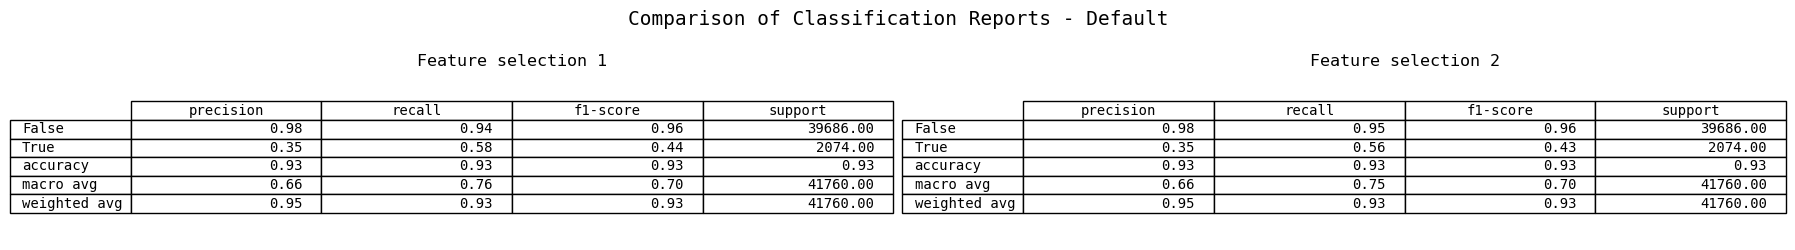

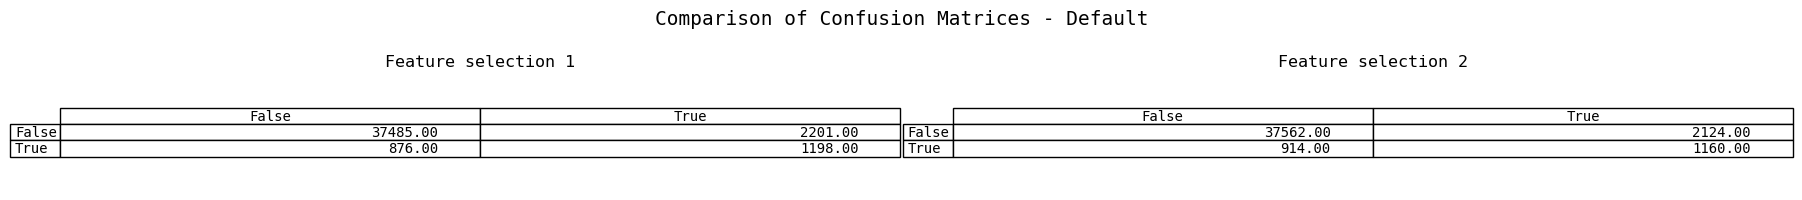

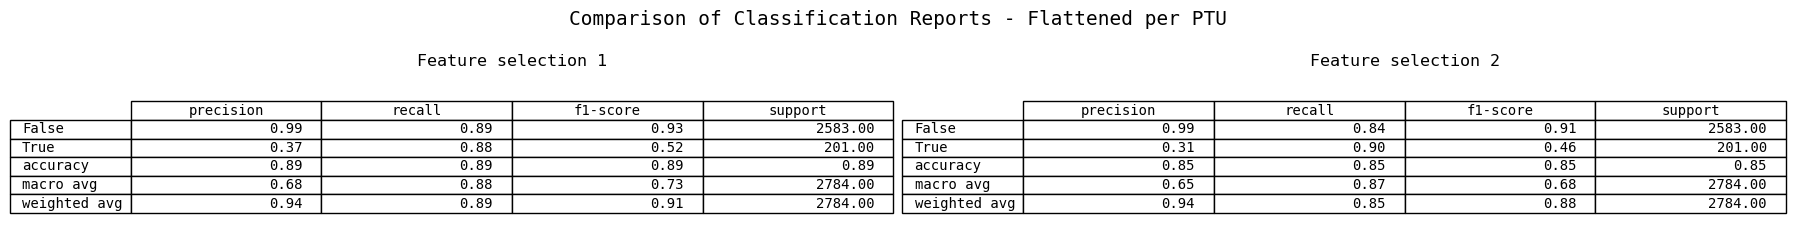

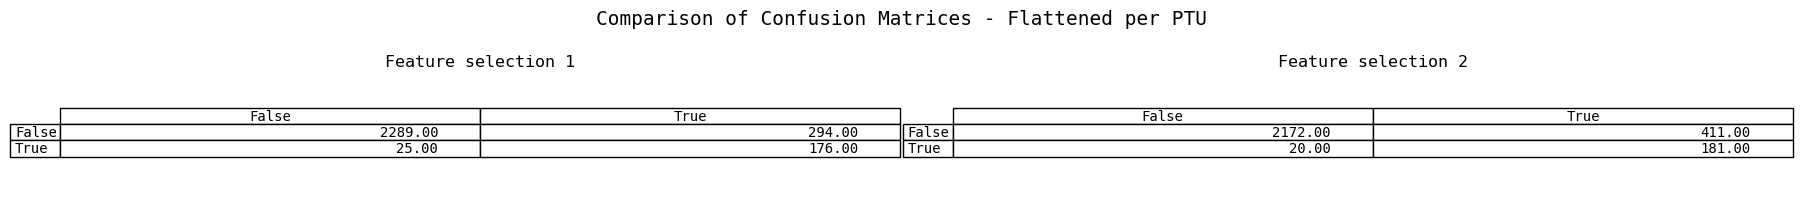

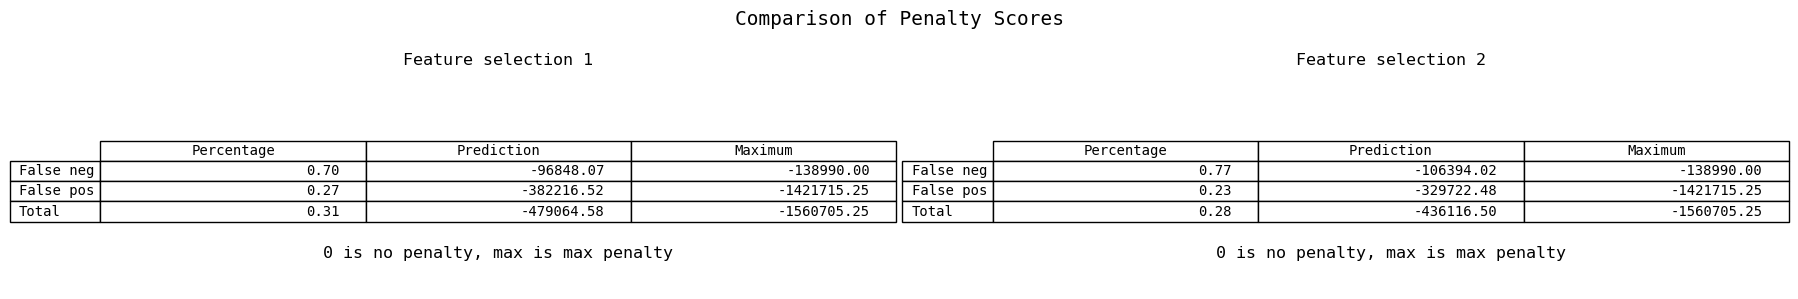

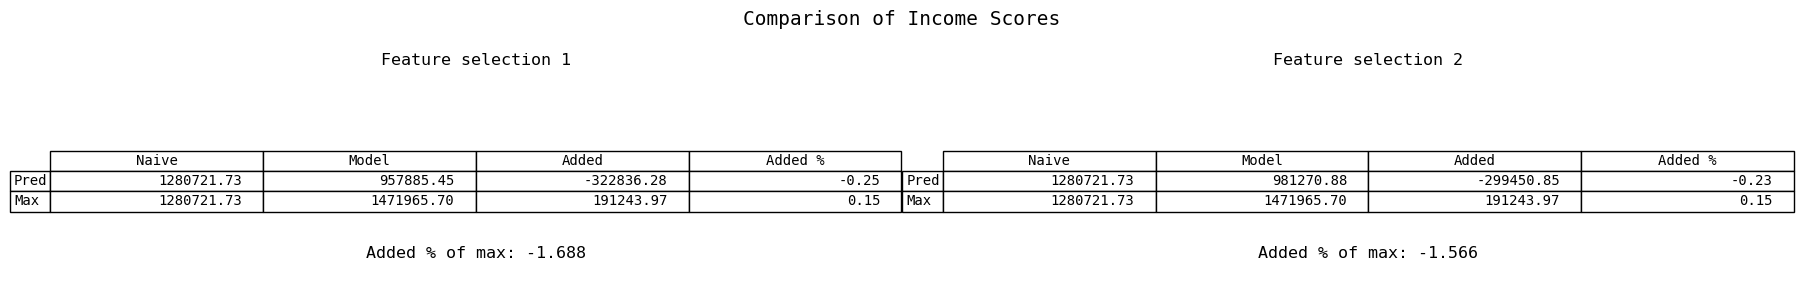

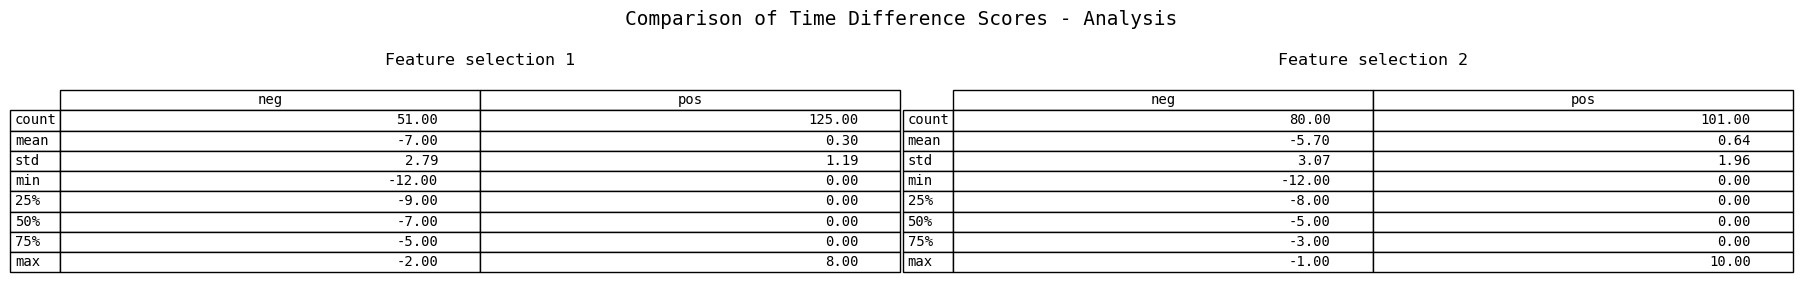

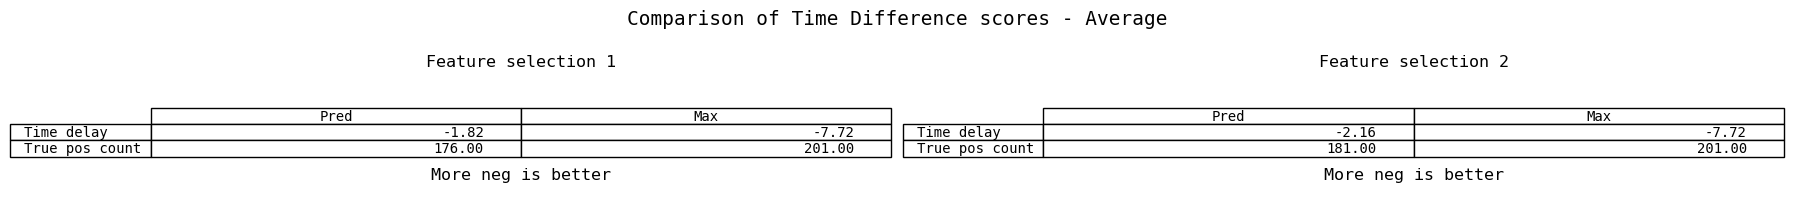

In [ ]:
show_metrics_multi(splits[test_set][3], [p1, p2], titles=["Feature selection 1", "Feature selection 2"], version=version)